Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('flights')
print(df.head())
print(df.tail())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432


In [5]:
#Here we only have months and year with us so we also need day so

df['yearMonth'] = '01-'+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None
   year month  passengers    yearMonth
0  1949   Jan         112  01-Jan-1949
1  1949   Feb         118  01-Feb-1949
2  1949   Mar         132  01-Mar-1949
3  1949   Apr         129  01-Apr-1949
4  1949   May         121  01-May-1949


In [6]:
#The near columns is of type object(string) so we need to convert it into data format
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None


In [7]:
#Make the yearmonth column as dataframe index
df.set_index('yearMonth',inplace = True)
#inplace makes the changes permanent to df

print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


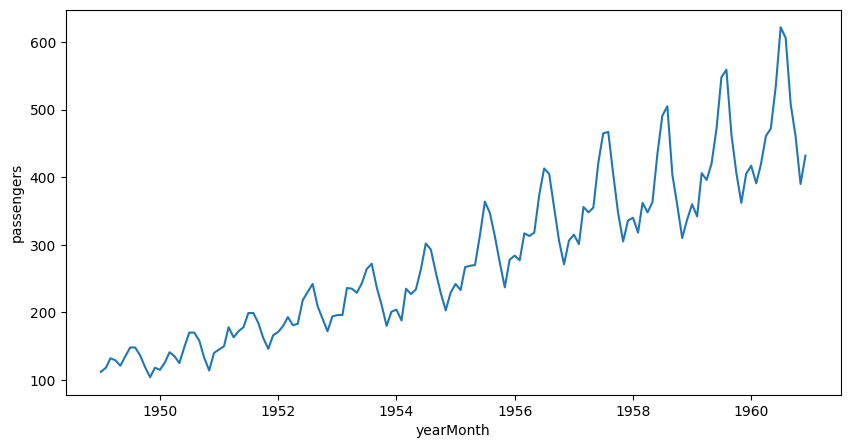

In [8]:
#Visualize the time series
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x = df.index, y = df.passengers)
plt.show()

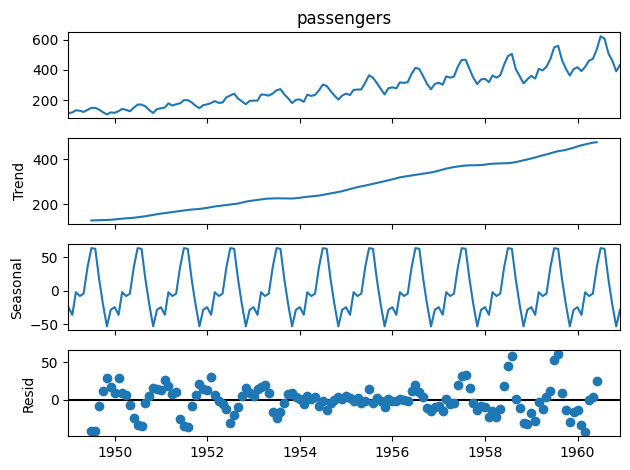

In [12]:
#check further seasonality and trends by doing decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers,period = 12)
fig = decomposition.plot()
plt.show()

upwards trend and clear seasonality 

In [13]:
#check if the time series is stationary
#rolling mean and standard deviations for 12 months

df['rollMean'] = df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()

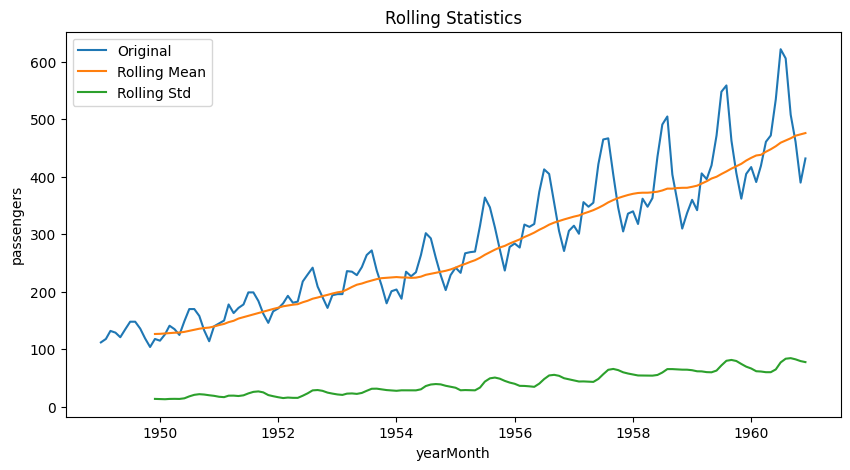

In [14]:
# Plot the original series with rolling mean and std
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x = df.index, y = df.passengers, label = 'Original')
sns.lineplot(data = df, y = df.rollMean, x = df.index, label = 'Rolling Mean')
sns.lineplot(data = df, x  =df.index, y = df.rollStd, label = 'Rolling Std')
plt.title("Rolling Statistics")
plt.show()

1. mean is NOT straight line
2. std deviation is in a straight line

Conclusion: Our time series is NOT in stationary line